In [1]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)

In [2]:
# Read the data into a Pandas DataFrame
world_data_df = pd.read_csv('https://raw.githubusercontent.com/nikatnguyen/project3/main/world-data-2023.csv')
world_data_df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [3]:
#Extract country, total tax rates, and life expectancy into a new dataframe 
tax_rate_df = world_data_df.loc[:, ["Country", "Life expectancy", "Total tax rate"]]
tax_rate_df.head()

,Country,Life expectancy,Total tax rate
0,Afghanistan,64.5,71.40%
1,Albania,78.5,36.60%
2,Algeria,76.7,66.10%
3,Andorra,NaN,NaN
4,Angola,60.8,49.10%


In [4]:
# Drop all rows with missing information
tax_rate_df = tax_rate_df.dropna(how='any')

In [5]:
tax_rate_df.dtypes

Country             object
Life expectancy    float64
Total tax rate      object
dtype: object

In [6]:
#Remove % from Total tax rate
tax_rate_df["Total tax rate"] = tax_rate_df["Total tax rate"].str.replace('%', '')

In [7]:
#Rename columns
tax_rate_df.columns = ["Country", "Life Expectancy", "Total Tax Rate (%)"]
tax_rate_df.head()

,Country,Life Expectancy,Total Tax Rate (%)
0,Afghanistan,64.5,71.40
1,Albania,78.5,36.60
2,Algeria,76.7,66.10
4,Angola,60.8,49.10
5,Antigua and Barbuda,76.9,43.00


In [8]:
tax_rate_df["Life Expectancy"].count()

183

In [9]:
tax_rate_df["Total Tax Rate (%)"].count()

183

In [10]:
tax_rate_df.dtypes

Country                object
Life Expectancy       float64
Total Tax Rate (%)     object
dtype: object

In [11]:
# Convert the "life expectancy" and "tax rate" columns to numeric so the data can be used
tax_rate_df['Life Expectancy'] = pd.to_numeric(tax_rate_df['Life Expectancy'])

In [12]:
tax_rate_df['Total Tax Rate (%)'] = pd.to_numeric(tax_rate_df['Total Tax Rate (%)'])

In [13]:
tax_rate_df.dtypes

Country                object
Life Expectancy       float64
Total Tax Rate (%)    float64
dtype: object

In [14]:
tax_rate_df["Total Tax Rate (%)"] = tax_rate_df["Total Tax Rate (%)"].astype(str)

In [15]:
tax_rate_df.to_csv("tax_rate_df.csv", encoding='utf8', index=False)

# Data Visualization

Ideally, countries with higher tax rates should have higher life expectancies because tax dollars should be benefitting taxpayers

In [16]:
%matplotlib notebook

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as st

In [18]:
tax_rates = tax_rate_df["Total Tax Rate (%)"]
life_expectancy = tax_rate_df["Life Expectancy"]

<IPython.core.display.Javascript object>


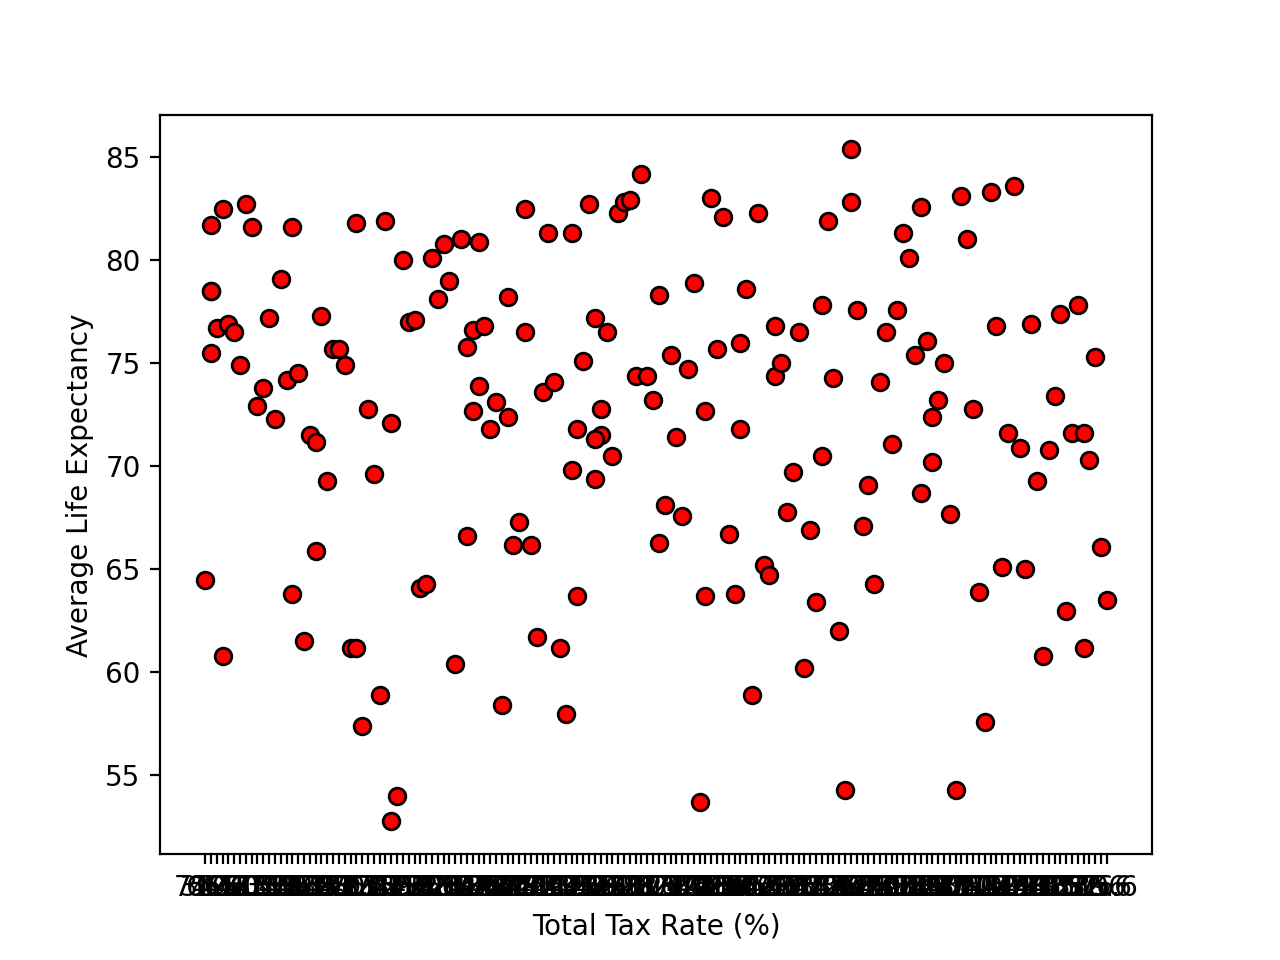

In [19]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(tax_rates, life_expectancy, marker="o", facecolors="red", edgecolors="black")
plt.show()

In [20]:
plt.xlabel('Total Tax Rate (%)')
plt.ylabel('Average Life Expectancy')
plt.show()

In [21]:
# Computing the Pearson correlation coefficient between "Total Tax Rate (%)" and "Life Expectancy"
tax = tax_rate_df.iloc[:,2].astype(float)
life = tax_rate_df.iloc[:,1].astype(float)
correlation = st.pearsonr(tax,life)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.19


In [ ]:
plt.plot(np.unique(tax), np.poly1d (np.polyfit(tax, life, 1 (np.unique (tax)), color = 'green' )

In [22]:
plt.savefig("tax_rate_life_expectancy.png")